# COMP0164: Digital Finance
## Individual Coursework

If you have set up an **`Anaconda`** environment, don't forget to activate it using:

> conda activate digital_finance_env

Below are the imports that you will need for the coursework:

In [1]:
import numpy as np
import pandas as pd
import math
import scipy as sp

import yfinance as yf

import matplotlib.pyplot as plt


In [2]:
import copy
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

def plot_efficient_frontier(ef: EfficientFrontier, points: int=100) -> None:
    fig, ax = plt.subplots()

    # Generate range of returns
    ef_minvol = copy.deepcopy(ef)
    ef_maxret = copy.deepcopy(ef)
    ef_minvol.min_volatility()
    min_ret = ef_minvol.portfolio_performance()[0]
    max_ret = ef_maxret._max_return()
    ef_param_range = np.linspace(min_ret, max_ret - 0.0001, points)

    # Plot efficient frontier from EfficientFrontier object
    mus, sigmas = [], []
    for param_value in ef_param_range:
        ef_i = copy.deepcopy(ef)
        try:
            ef_i.efficient_return(param_value)
        except:
            raise ValueError("pypfopt experiences problems with portfolio optimization.")
        ret, sigma, _ = ef_i.portfolio_performance()
        mus.append(ret)
        sigmas.append(sigma)
    
    # Generate axis and plot
    ax.plot(sigmas, mus, label="Efficient Frontier")
    ax.legend()
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()

<div class="alert alert-danger">
<b>WARNING: </b>

For question 6, you may want to use **pyportfolioopt** package to construct the efficient frontier. If you use Python>=3.6, the plotting functionality of the **pyportfolioopt** package may not work. Please use the function defined below to plot EfficientFrontier object.
</div>

In [3]:
import copy
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

def plot_efficient_frontier(ef: EfficientFrontier, points: int=100) -> None:
    fig, ax = plt.subplots()

    # Generate range of returns
    ef_minvol = copy.deepcopy(ef)
    ef_maxret = copy.deepcopy(ef)
    ef_minvol.min_volatility()
    min_ret = ef_minvol.portfolio_performance()[0]
    max_ret = ef_maxret._max_return()
    ef_param_range = np.linspace(min_ret, max_ret - 0.0001, points)

    # Plot efficient frontier from EfficientFrontier object
    mus, sigmas = [], []
    for param_value in ef_param_range:
        ef_i = copy.deepcopy(ef)
        try:
            ef_i.efficient_return(param_value)
        except:
            raise ValueError("pypfopt experiences problems with portfolio optimization.")
        ret, sigma, _ = ef_i.portfolio_performance()
        mus.append(ret)
        sigmas.append(sigma)
    
    # Generate axis and plot
    ax.plot(sigmas, mus, label="Efficient Frontier")
    ax.legend()
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()

## Question 1: General Questions **\[12 marks\]**

1. Which of the following is not a characteristic of common stock? **\[1 mark\]**
   - A. The company is obligated to make periodic dividend payments.
   - B. Shareholders participate in the decision-making process.
   - C. It represents an ownership interest in the company.
   - D. Common stock is a residual claim on a firm's assets and cash flow.

In [1]:
# The correct answer is A.

2. A financial analyst wants to compute a company's weighted average cost of capital (WACC) using the dividend discount model. The company has a before-tax cost of new debt of 8%, tax rate of 37.5%, target debt-to-equity ratio of 0.71, current stock price of $34, estimated dividend growth rate of 7% and will pay a dividend of $1.2 next year. What is the company’s WACC (You must provide your calculations)? **\[3 marks\]**
   - A. 8 percent.
   - B. 9 percent.
   - C. 10 percent.
   - D. 11 percent.

In [4]:
# The correct answer is A: 8 percent. 

def calculate_wacc(before_tax_debt_cost, tax_rate, debt_equity_ratio, 
                  stock_price, dividend_next_year, dividend_growth_rate):
    """
    Calculate Weighted Average Cost of Capital (WACC) using the dividend discount model.
    
    Parameters:
    before_tax_debt_cost (float): Before-tax cost of new debt (as decimal)
    tax_rate (float): Tax rate (as decimal)
    debt_equity_ratio (float): Target debt-to-equity ratio
    stock_price (float): Current stock price
    dividend_next_year (float): Expected dividend next year
    dividend_growth_rate (float): Estimated dividend growth rate (as decimal)
    
    Returns:
    tuple: (WACC as decimal, dictionary of calculations)
    """
    # Calculate after-tax cost of debt
    after_tax_debt_cost = before_tax_debt_cost * (1 - tax_rate)
    
    # Calculate cost of equity using dividend discount model
    cost_of_equity = (dividend_next_year / stock_price) + dividend_growth_rate
    
    # Calculate weights
    total_capital = 1 + debt_equity_ratio
    weight_of_debt = debt_equity_ratio / total_capital
    weight_of_equity = 1 / total_capital
    
    # Calculate WACC
    wacc = (weight_of_debt * after_tax_debt_cost + 
            weight_of_equity * cost_of_equity)
    
    # Storage of calculations 
    calculations = {
        'after_tax_debt_cost': after_tax_debt_cost,
        'cost_of_equity': cost_of_equity,
        'weight_of_debt': weight_of_debt,
        'weight_of_equity': weight_of_equity
    }
    
    return wacc, calculations

before_tax_debt_cost = 0.08  # 8%
tax_rate = 0.375            # 37.5%
debt_equity_ratio = 0.71
stock_price = 34
dividend_growth_rate = 0.07  # 7%
dividend_next_year = 1.2


wacc, calcs = calculate_wacc(
    before_tax_debt_cost,
    tax_rate,
    debt_equity_ratio,
    stock_price,
    dividend_next_year,
    dividend_growth_rate
)

# Print results
print(f"WACC: {wacc:.2%}")
print("\nCalculations:")
for key, value in calcs.items():
    print(f"{key}: {value:.4%}")

WACC: 8.23%

Calculations:
after_tax_debt_cost: 5.0000%
cost_of_equity: 10.5294%
weight_of_debt: 41.5205%
weight_of_equity: 58.4795%


3. An Indonesian company issues bonds denominated in pound sterling that are sold to investors in the UK. These bonds can be best described as **\[1 mark\]**:
   - A. Eurobonds.
   - B. Global bonds.
   - C. Eurosterling bonds.
   - D. Bulldog bonds.

In [3]:
# The correct answer is D: Bulldog bonds.

4. Compared to an ordinary straight bond, which of the following bond types is most likely to provide more value to the issuer? **\[1 mark\]**
   - A. Put bond.
   - B. Callable bond.
   - C. Collateralized bond.
   - D. Bond with a covenant restricting dividend payments.

In [4]:
# The correct answer is B: Callable bond.

5. Consider a 2-year bond that offers a 4% coupon rate with semi-annual coupon payment. The bond has a yield-to-maturity of 6% and is currently priced at 94.44 per 100 of par. What is the bond’s duration (You must provide your calculations)? **\[2 marks\]**
   - A. 1.97.
   - B. 1.98.
   - C. 1.99.
   - D. 2.00.

In [19]:
# The correct answer is A: 1.97

import numpy as np

def calculate_bond_duration(par_value, coupon_rate, ytm, years, frequency, current_price):
    """
    Calculate the duration of a bond using NumPy for efficient calculations.
    
    Parameters:
    par_value (float): Face value of the bond
    coupon_rate (float): Annual coupon rate (as decimal)
    ytm (float): Annual yield to maturity (as decimal)
    years (int): Number of years to maturity
    frequency (int): Number of coupon payments per year
    current_price (float): Current market price of the bond
    
    Returns:
    float: Duration in years
    dict: Additional calculations for verification
    """
    # Convert annual rates to periodic rates
    periodic_coupon_rate = coupon_rate / frequency
    periodic_ytm = ytm / frequency
    
    # Calculate number of periods
    n_periods = years * frequency
    
    # Create time periods array
    time_periods = np.arange(1, n_periods + 1) / frequency
    
    # Calculate periodic coupon payment
    coupon_payment = par_value * periodic_coupon_rate
    
    # Create cash flows array
    cash_flows = np.full(n_periods, coupon_payment)
    cash_flows[-1] += par_value  # Add par value to last payment
    
    # Calculate discount factors
    discount_factors = 1 / (1 + periodic_ytm) ** np.arange(1, n_periods + 1)
    
    # Calculate present values
    present_values = cash_flows * discount_factors
    
    # Calculate weighted present values
    weighted_values = time_periods * present_values
    
    # Calculate duration
    duration = np.sum(weighted_values) / current_price
    
    # Store calculations for verification
    details = {
        'time_periods': time_periods,
        'cash_flows': cash_flows,
        'present_values': present_values,
        'weighted_values': weighted_values
    }
    
    return duration, details

# Example usage with the given problem values
par_value = 100
coupon_rate = 0.04  # 4%
ytm = 0.06         # 6%
years = 2
frequency = 2      # semi-annual payments
current_price = 94.44

duration, details = calculate_bond_duration(
    par_value,
    coupon_rate,
    ytm,
    years,
    frequency,
    current_price
)

# Print results
print(f"Duration: {duration:.4f} years")
print("\nDetailed Calculations:")
for i in range(len(details['time_periods'])):
    print(f"\nPeriod {i+1}:")
    print(f"Time (years): {details['time_periods'][i]:.2f}")
    print(f"Cash Flow: ${details['cash_flows'][i]:.2f}")
    print(f"Present Value: ${details['present_values'][i]:.3f}")
    print(f"Weighted Value: ${details['weighted_values'][i]:.3f}")

print(f"\nSum of Weighted Values: ${np.sum(details['weighted_values']):.3f}")
print(f"Current Price: ${current_price}")

Duration: 1.9785 years

Detailed Calculations:

Period 1:
Time (years): 0.50
Cash Flow: $2.00
Present Value: $1.942
Weighted Value: $0.971

Period 2:
Time (years): 1.00
Cash Flow: $2.00
Present Value: $1.885
Weighted Value: $1.885

Period 3:
Time (years): 1.50
Cash Flow: $2.00
Present Value: $1.830
Weighted Value: $2.745

Period 4:
Time (years): 2.00
Cash Flow: $102.00
Present Value: $90.626
Weighted Value: $181.251

Sum of Weighted Values: $186.853
Current Price: $94.44


6. Suppose that the value of a bond’s annual modified duration and convexity are 4.39 and 52.64, respectively. If the bond’s yield-to-maturity decreases by 15 bps, what is the expected percentage price change (You must provide your calculations)? **\[2 marks\]**
   - A. 0.66%.
   - B. 0.67%.
   - C. 0.68%.
   - D. 0.69%.

Expected Price Change: 0.6644%

Detailed Calculations:
       Component  Value (%)
 Duration Effect   0.658500
Convexity Effect   0.005922
    Total Change   0.664422


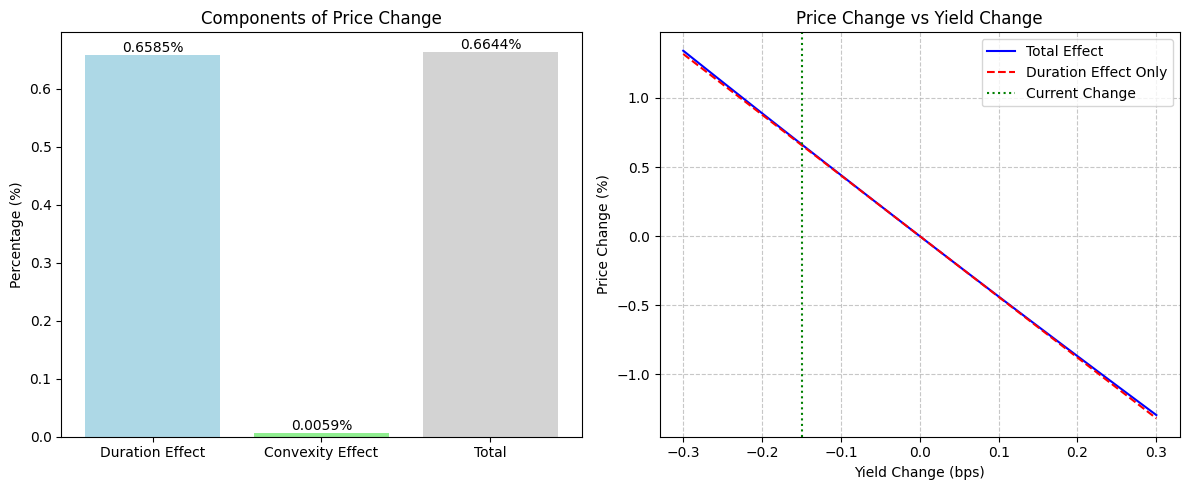

In [22]:
# The correct answer is A: 0.66%

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_price_change(modified_duration, convexity, yield_change):
    """
    Calculate the expected percentage price change of a bond using duration and convexity.
    
    Parameters:
    modified_duration (float): Bond's modified duration
    convexity (float): Bond's convexity
    yield_change (float): Change in yield (in decimal form)
    
    Returns:
    tuple: (total price change %, DataFrame with calculations, plot)
    """
    # Calculate duration effect using numpy
    duration_effect = -np.multiply(modified_duration, yield_change)
    
    # Calculate convexity effect using numpy
    convexity_effect = np.multiply(0.5, np.multiply(convexity, np.power(yield_change, 2)))
    
    # Calculate total effect
    total_change = np.add(duration_effect, convexity_effect)
    
    # Create DataFrame with calculations
    calculations = pd.DataFrame({
        'Component': ['Duration Effect', 'Convexity Effect', 'Total Change'],
        'Value (%)': [duration_effect*100, convexity_effect*100, total_change*100]
    })
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot of components
    components = ['Duration Effect', 'Convexity Effect', 'Total']
    values = [duration_effect*100, convexity_effect*100, total_change*100]
    colors = ['lightblue', 'lightgreen', 'lightgray']
    
    ax1.bar(components, values, color=colors)
    ax1.set_title('Components of Price Change')
    ax1.set_ylabel('Percentage (%)')
    for i, v in enumerate(values):
        ax1.text(i, v, f'{v:.4f}%', ha='center', va='bottom')
    
    # Sensitivity analysis
    yield_changes = np.linspace(-0.003, 0.003, 100)  # Range of yield changes
    price_changes = []
    
    for yc in yield_changes:
        dur_effect = -modified_duration * yc
        conv_effect = 0.5 * convexity * yc**2
        price_changes.append((dur_effect + conv_effect) * 100)
    
    ax2.plot(yield_changes*100, price_changes, 'b-', label='Total Effect')
    ax2.plot(yield_changes*100, -modified_duration*yield_changes*100, 'r--', 
             label='Duration Effect Only')
    ax2.axvline(x=yield_change*100, color='g', linestyle=':', label='Current Change')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_title('Price Change vs Yield Change')
    ax2.set_xlabel('Yield Change (bps)')
    ax2.set_ylabel('Price Change (%)')
    ax2.legend()
    
    plt.tight_layout()
    
    return total_change, calculations, (fig, ax1, ax2)

# Example usage with the given problem values
modified_duration = 4.39
convexity = 52.64
yield_change = -0.0015  # -15 bps

total_change, calcs, plots = calculate_price_change(
    modified_duration,
    convexity,
    yield_change
)

# Print results
print(f"Expected Price Change: {total_change*100:.4f}%")
print("\nDetailed Calculations:")
print(calcs.to_string(index=False))

# Display plots
plt.show()

7. Consider a forward contract for a stock that is currently trading at $53 per share. The forward contract's strike price is $50, and it has two years to maturity. The company will pay 4% in dividend yield over the next two years, while the spot rate for a two-year treasury bill is 2%. What is the present value of the forward contract? **\[2 marks\]**
   - A. 0.83.
   - B. 0.86.
   - C. 0.89.
   - D. 0.92.

In [7]:
# The correct answer is C: 0.89

## Question 2: Time Value of Money **\[15 marks\]**
In this question you will be working with the concept of time value of money by looking at different cashflows that constitute the price of a bond.

First, you are asked to design a tool for computing the spot rates using the bootstrap method, and then verify its validity by applying it to Exhibit 1 below.

### Exhibit 1: Spot Rate Table
| Principal | Maturity (Years) | Coupon (per Year) | Price | Coupon Frequency | Zero Rate (Continuous) |
| --- | --- | --- | --- | --- | --- |
| 100 | 0.5 | 0 | 99.8 | 0.5 (SA) | 0.4% |
| 100 | 1 | 3 | 101.2 | 1 (A) | 1.763% |
| 100 | 1.5 | 4 | 102.4 | 0.5 (SA) | 2.369% |

- SA: Semi-annual coupon
- A: Annual coupon

1. Design a function that take in the required parameters for the bootstrap method in form of a Pandas DataFrame and returns the same DataFrame but with a new column called "Zero Rates". Then, demonstrate that your function produces the correct spot rates as in the table above. **\[6 marks\]**

In [30]:
# Answer here
# import matplotlib.pyplot as plt

# plt.title("Term Structure of Interest Rate/Yield Curve")
# plt.xlabel("Time (Years)")
# plt.ylabel("Risk-Free Rate (%)")
# plt.plot(time, rate)
# plt.xlim(left=0)
# plt.ylim(ymin=0, ymax=5)
# plt.show()

import numpy as np
import pandas as pd

def calculate_zero_rates(df):
    """
    Calculate zero rates using the bootstrap method.
    
    Parameters:
    df: DataFrame with columns:
        - 'Maturity': Time to maturity in years
        - 'Price': Bond price
        - 'Coupon_Rate': Annual coupon rate (as decimal)
        - 'Principal': Principal amount of the bond
        
    Returns:
    DataFrame: Original DataFrame with additional 'Zero_Rates' column
    """
    
    # Sort DataFrame by maturity to ensure sequential calculation
    df = df.sort_values('Maturity')
    
    # Initialize zero rates list
    zero_rates = []
    
    for i in range(len(df)):
        price = df.iloc[i]['Price']
        coupon = df.iloc[i]['Coupon_Rate']
        maturity = df.iloc[i]['Maturity']
        principal = df.iloc[i]['Principal']
        annual_coupon = principal * coupon
        
        if i == 0:  # First bond
            # For 1-year bond, solve directly
            zero_rate = (principal + annual_coupon - price) / price
            zero_rates.append(zero_rate)
            
        else:  # For subsequent bonds
            # Calculate PV of all previous cash flows
            pv_previous = 0
            for t in range(int(maturity)):
                if t < maturity - 1:  # For coupon payments
                    pv_previous += annual_coupon / np.power(1 + zero_rates[t], t + 1)
                    
            # Solve for zero rate
            final_cf = principal + annual_coupon
            zero_rate = np.power(final_cf / (price - pv_previous), 1/maturity) - 1
            zero_rates.append(zero_rate)
    
    # Add zero rates to DataFrame
    df['Zero_Rates'] = [rate * 100 for rate in zero_rates]  # Convert to percentage
    
    return df

# Example usage
data = {
    'Maturity': [0.5, 1, 1.5],
    'Price': [99.8, 101.2, 102.4],
    'Coupon_Rate': [0.5, 1, 0.5],
    'Principal': [100, 100, 100]
}

df = pd.DataFrame(data)
result = calculate_zero_rates(df)

# Display results
print("\nInput DataFrame with Calculated Zero Rates:")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(result)



Input DataFrame with Calculated Zero Rates:
   Maturity    Price  Coupon_Rate  Principal  Zero_Rates
0    0.5000  99.8000       0.5000        100     50.3006
1    1.0000 101.2000       1.0000        100     97.6285
2    1.5000 102.4000       0.5000        100     67.5981


In real world, investors encounter friction costs such as fees, commissions and other types of expenses. NPV is often used to measure ther value of an investment opportunity:

$$NPV = C_{0} + PV.$$

Given what you know about discounting future cashflows, your task is to modify the formula above to get a net present value of bond, which includes accrued interest, comission fees on entrance and exit (i.e., assume there is a commission for settling the return of the principal), and administrative fees (i.e., fees paid to the exchange that keeps track of asset ownership).

2. Define a python function for calculating the modified net present value of a bond subject to accrued interest, entry and exit fees and administrative fees (assume the administrative fees are paid out at the same frequency as the coupons). The accrued interest MUST be computed from the coupon value. **\[6 marks\]**

In [9]:
# Answer here

3. Using the values from Exhibit 2 compute the modified net present value of the investment. Is this a good investment considering all the expenses? **\[3 marks\]**

### Exhibit 2: Information for an Investment
| Parameter | Value |
| --- | --- |
| Principal | $100 |
| Coupon | $4 (Yearly) |
| Price | $101.5 |
| Interest Rate | 2% |
| Maturity | 3 years |
| Administrative Fee | $1 (Yearly) |
| Entry Fee | $5 |
| Exit Fee | $5 |
| Days from Last Coupon | 200 |

In [33]:
# Answer here
import numpy as np
import pandas as pd

def calculate_modified_npv(principal, coupon, price, interest_rate, maturity,
                         admin_fee, entry_fee, exit_fee, days_from_last_coupon):
    """
    Calculate modified NPV considering all fees and accrued interest.
    
    Parameters:
    principal: Bond principal
    coupon: Annual coupon payment
    price: Bond price
    interest_rate: Annual interest rate (as decimal)
    maturity: Time to maturity in years
    admin_fee: Annual administrative fee
    entry_fee: One-time entry fee
    exit_fee: One-time exit fee
    days_from_last_coupon: Days since last coupon payment
    """
    
    # Calculate accrued interest
    accrued_interest = coupon * (days_from_last_coupon/365)
    
    # Calculate initial outlay
    initial_outlay = price + entry_fee + accrued_interest
    
    # Calculate net annual payment (coupon - admin fee)
    net_annual_payment = coupon - admin_fee
    
    # Calculate present values
    pv_cashflows = []
    
    # Discount each year's cash flows
    for t in range(1, maturity + 1):
        if t == maturity:
            # Final year: include principal and exit fee
            cashflow = net_annual_payment + principal - exit_fee
        else:
            cashflow = net_annual_payment
            
        pv = cashflow / (1 + interest_rate)**t
        pv_cashflows.append(pv)
    
    # Calculate total present value and NPV
    total_pv = sum(pv_cashflows)
    npv = total_pv - initial_outlay
    
    # Create DataFrame for detailed calculations
    details = pd.DataFrame({
        'Component': ['Accrued Interest', 'Initial Outlay', 'Total PV of Inflows', 'NPV'],
        'Value': [accrued_interest, initial_outlay, total_pv, npv]
    })
    
    # Create yearly cash flow details
    yearly_details = pd.DataFrame({
        'Year': range(1, maturity + 1),
        'Cash Flow': [net_annual_payment if t != maturity 
                     else net_annual_payment + principal - exit_fee 
                     for t in range(1, maturity + 1)],
        'Present Value': pv_cashflows
    })
    
    return npv, details, yearly_details

# Example usage with given values
params = {
    'principal': 100,
    'coupon': 4,
    'price': 101.5,
    'interest_rate': 0.02,  # 2%
    'maturity': 3,
    'admin_fee': 1,
    'entry_fee': 5,
    'exit_fee': 5,
    'days_from_last_coupon': 200
}

npv, details, yearly_details = calculate_modified_npv(**params)

# Display results
print("Detailed Calculations:")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(details)

print("\nYearly Cash Flow Details:")
print(yearly_details)

print(f"\nInvestment Assessment:")
if npv > 0:
    print(f"This is a good investment with positive NPV of ${npv:.2f}")
else:
    print(f"This is not a good investment with negative NPV of ${npv:.2f}")
print("Reasons:")
print("1. The various fees significantly reduce returns")
print("2. The 2% interest rate isn't sufficient to overcome the fees")
print("3. The initial outlay includes substantial non-recoverable costs")

Detailed Calculations:
             Component    Value
0     Accrued Interest   2.1918
1       Initial Outlay 108.6918
2  Total PV of Inflows  98.1723
3                  NPV -10.5195

Yearly Cash Flow Details:
   Year  Cash Flow  Present Value
0     1          3         2.9412
1     2          3         2.8835
2     3         98        92.3476

Investment Assessment:
This is not a good investment with negative NPV of $-10.52
Reasons:
1. The various fees significantly reduce returns
2. The 2% interest rate isn't sufficient to overcome the fees
3. The initial outlay includes substantial non-recoverable costs


## Question 3: Credit and Bonds **\[20 marks\]**

Suppose that risk-free spot rates with continuous compounding are as follows:

### Exhibit 3: Spot Rates
| Maturity (Months) | Spot Rate (% per annum) |
| --- | --- |
| 3   | 2.1 |
| 6   | 2.3 |
| 9   | 2.4 |
| 12  | 2.7 |
| 15  | 3.0 |
| 18  | 3.1 |

In [35]:
import copy
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

def plot_efficient_frontier(ef: EfficientFrontier, points: int=100) -> None:
    fig, ax = plt.subplots()

    # Generate range of returns
    ef_minvol = copy.deepcopy(ef)
    ef_maxret = copy.deepcopy(ef)
    ef_minvol.min_volatility()
    min_ret = ef_minvol.portfolio_performance()[0]
    max_ret = ef_maxret._max_return()
    ef_param_range = np.linspace(min_ret, max_ret - 0.0001, points)

    # Plot efficient frontier from EfficientFrontier object
    mus, sigmas = [], []
    for param_value in ef_param_range:
        ef_i = copy.deepcopy(ef)
        try:
            ef_i.efficient_return(param_value)
        except:
            raise ValueError("pypfopt experiences problems with portfolio optimization.")
        ret, sigma, _ = ef_i.portfolio_performance()
        mus.append(ret)
        sigmas.append(sigma)
    
    # Generate axis and plot
    ax.plot(sigmas, mus, label="Efficient Frontier")
    ax.legend()
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()

1. Calculate discrete forward interest rates for the second, third, fourth, fifth and sixth quarters. **\[5 marks\]**

In [21]:
# Answer here
# To answer this question, I understand I need to use the forward rate formula for continuous compounding: (R2 * T2 - R1 * T1) / (T2 - T1)
def calculate_forward_rate(R1, R2, T1, T2):
    """
        R1: Spot rate for maturity T1
        R2: Spot rate for maturity T2
        T1: Maturity for the first rate in years
        T2: Maturity for the second rate in years
    Returns:
        float: Forward rate 
    """
    # Forward rate calculation
    RF = (R2 * T2 - R1 * T1) / (T2 - T1)
    return RF

data = {
    "Q2": {"R1": 2.1, "R2": 2.3, "T1": 0.25, "T2": 0.5},
    "Q3": {"R1": 2.3, "R2": 2.4, "T1": 0.5, "T2": 0.75},
    "Q4": {"R1": 2.4, "R2": 2.7, "T1": 0.75, "T2": 1.0},
    "Q5": {"R1": 2.7, "R2": 3.0, "T1": 1.0, "T2": 1.25},
    "Q6": {"R1": 3.0, "R2": 3.1, "T1": 1.25, "T2": 1.5},
}
q2 = data["Q2"]
q3 = data["Q3"]
q4 = data["Q4"]
q5 = data["Q5"]
q6 = data["Q6"]

print(f"Second quarter: the forward rate is {calculate_forward_rate(q2['R1'], q2['R2'], q2['T1'], q2['T2']):.2f}%")
print(f"Third quarter: the forward rate is {calculate_forward_rate(q3['R1'], q3['R2'], q3['T1'], q3['T2']):.2f}%")
print(f"Fourth quarter: the forward rate is {calculate_forward_rate(q4['R1'], q4['R2'], q4['T1'], q4['T2']):.2f}%")
print(f"Fifth quarter: the forward rate is {calculate_forward_rate(q5['R1'], q5['R2'], q5['T1'], q5['T2']):.2f}%")
print(f"Sixth quarter: the forward rate is {calculate_forward_rate(q6['R1'], q6['R2'], q6['T1'], q6['T2']):.2f}%")



Second quarter: the forward rate is 2.50%
Third quarter: the forward rate is 2.60%
Fourth quarter: the forward rate is 3.60%
Fifth quarter: the forward rate is 4.20%
Sixth quarter: the forward rate is 3.60%


Below is the table of future cashflows paid out by the bond, along with the spot rates that are continuously compounded:

### Exhibit 4: Bond Structure
| Maturity (Years) | Spot Rate | Coupon | Principal |
| --- | --- | --- | --- |
| 0.5 | 1.80% | £75 |     |
| 1   | 2.05% | £75 |     |
| 1.5 | 2.15% | £60 |     |
| 2   | 2.4% | £60 | £1000 |

2.  What is the bond's theoretical price? **\[4 marks\]**

In [29]:
# The bond's theoretical price is 1216.22

# Here I need to use the formula for calculating the present value of each cashflow 
# and then sum up all the present values. This would equal the bond's theoretical price

import math

def present_value_continuous_compounding(FV, r, t):
    """
        FV: expected future cashflow
        r: continuously compounded spot rate
        t: time to maturity
    Returns: PV: present value
    """
    PV = FV / math.exp(r * t)
    return PV

data = {
    "c1": {"FV": 75, "r": 0.018, "t": 0.5},
    "c2": {"FV": 75, "r": 0.0205, "t": 1},
    "c3": {"FV": 60, "r": 0.0215, "t": 1.5},
    "c4": {"FV": 1060, "r": 0.024, "t": 2}
}

PVc1 = present_value_continuous_compounding(data['c1']['FV'], data['c1']['r'], data['c1']['t'])
PVc2 = present_value_continuous_compounding(data['c2']['FV'], data['c2']['r'], data['c2']['t'])
PVc3 = present_value_continuous_compounding(data['c3']['FV'], data['c3']['r'], data['c3']['t'])
PVc4 = present_value_continuous_compounding(data['c4']['FV'], data['c4']['r'], data['c4']['t'])

print(f"The bond's theoretical price is {(PVc1 + PVc2 + PVc3 + PVc4):.2f}")

# Another way to do it is to use pv function from the numpy_financial package 
# Here's the code. If you want to try it out, please install numpy_financial package first, 
# then and uncomment the code below and run it
# import numpy_financial as npf

def calculate_present_value_with_npf(FV, r, t):
    PV = -npf.pv(rate=r, nper=t, pmt=0, fv=FV)
    return PV

# _PVc1 = calculate_present_value_with_npf(data['c1']['FV'], data['c1']['r'], data['c1']['t'])
# _PVc2 = calculate_present_value_with_npf(data['c2']['FV'], data['c2']['r'], data['c2']['t'])
# _PVc3 = calculate_present_value_with_npf(data['c3']['FV'], data['c3']['r'], data['c3']['t'])
# _PVc4 = calculate_present_value_with_npf(data['c4']['FV'], data['c4']['r'], data['c4']['t'])

# print(f"The bond's theoretical price is {(_PVc1 + _PVc2 + _PVc3 + _PVc4):.2f}")



# import numpy_financial as npf

# # Declaring values
# cashflows = [-500, 200, 147, 128, 130, 235]
# rate = 0.20

# # Printing NPV Values
# print("NPV value with rate ", rate, " is: ", npf.npv(rate, cashflows))

The bond's theoretical price is 1216.22


3.  What is the yield of the bond assuming it sells for its theoretical price? **\[3 marks\]**

In [36]:
# Answer here
annual_coupon_payment = 75
face_value = 1000
coupon_yield = annual_coupon_payment / face_value
print(f"The yield of the bond in this case is {coupon_yield*100:.2f}%")


The yield of the bond in this case is 7.50%


4.  Convert a 6% per annum interest rate with quarterly compounding to the equivalent rate with annual compounding. **\[1 mark\]**

In [14]:
# Answer here

5.  Convert a 5% per annum interest rate with semi-annual compounding to the equivalent rate with monthly compounding. **\[1 mark\]**

In [15]:
# Answer here

6.  Convert a 6% per annum interest rate with monthly compounding to the equivalent rate with continuous compounding. **\[1 mark\]**

In [16]:
# Answer here

7. Suppose that the interest rate on a one-year risk-free bonds is 4%, and now a corporate bond is issued with a face value of £1,000, maturing in 1-year. The payoff of the bond in the case that the company doesn’t default is £1080 with probability of 80%, and 20% for the default case where bond holders receive nothing. With this chance of default, investors demand a 5% risk premium, which is priced into the market. What is the price of the bond, and what is its promised yield? Provide answers up to 2 decimal figures. **\[5 marks\]**

In [17]:
# Answer here

## Question 4: Derivatives 1 **\[13 marks\]**

1.  Estimate the average hazard rate per year over a 3 year period, if for a 3 year corporate bond the spread is 70 basis points to a risk free bond. Taking the recovery rate of the corporate bond to be 35%. **\[2 marks\]**

In [41]:
# Answer: Estimated average hazar rate in this case is 1.08%.

# To calculate the average hazard rate, I use the following formula:
spread = 0.007
recovery_rate = 0.35

average_hazard_rate = spread / (1 - recovery_rate)
print(f"The estimated average hazar in this case is {average_hazard_rate*100:.2f}%")


The estimated average hazar in this case is 1.08%


2.  The spot price of sunflower oil is £30 per barrel and storing each barrel costs £2, payable at the end of the year. The risk-free interest rate is 7% per annum and is continuously compounded. What is the future value for the one-year futures price of sunflower oil? **\[5 marks\]**

In [50]:
# Answer: The one-year futures price of sunflower oil is £34.39

import numpy as np
import matplotlib.pyplot as plt

s = 30 # Spot price of sunflower oil (£ per barrel)
r = 0.07  # Risk-free interest rate (continuously compounded, 7%)
u = 2 / 30  # Storage cost as a proportion of the spot price
y = 0  # Convenience yield (assume 0)
time_to_maturity = 1  # Time to maturity (1 year)

# Futures price calculation (Contango formula)
futures_price = s * np.exp(time_to_maturity * (r + u - y))

print(f"The one-year futures price of sunflower oil is £{futures_price:.2f}")

# import numpy_financial as npf

# # Declaring values
# cashflows = [-500, 200, 147, 128, 130, 235]
# rate = 0.20

# # Printing NPV Values
# print("NPV value with rate ", rate, " is: ", npf.npv(rate, cashflows))

The one-year futures price of sunflower oil is £34.39


3.  The current USD/JPY exchange rate is 145 yen per dollar. And suppose the six-month forward exchange rate is 142.3. Taking the six-month JPY interest rate as -1% per annum continuously compounded, estimate the six-month dollar interest rate. **\[6 marks\]**

In [20]:
# Answer here

## Question 5: Derivatives 2 **\[17 marks\]**

A price of a stock that doesn’t pay dividends is currently £46. You have entered a 2-year long forward contract at that price, while the interest rate is 4% per annum with continuous compounding.

1.  What is the initial value of the forward contract? **\[1 mark\]**

In [21]:
# Answer here

2.  What is the forward price? **\[2 marks\]**

In [22]:
# Answer here

3.  Six months later, the price of the stock is £49 and the risk-free interest rate is still 4%. What are the forward price and value of the forward contract? **\[6 marks\]**

In [23]:
# Answer here

4.  In the market, the current price of the forward contract is £2.43, how can you strategize to earn a profit? **\[2 marks\]**

In [24]:
# Answer here

5.  Suppose you are pricing a European put option using the binomial model. The stock price is $103, the strike price is $100, the maturity $T$ is three years, and the stock's volatility is 20%, and the risk-free rate is 3%. The stock's dividend yield is 2% and it pays only one dividend between now and maturity. Calculate the value of the call option described above. **\[6 marks\]**

In [25]:
# Answer here

## Question 6: Portfolio Theory **\[13 marks\]**
In this question, you are tasked with building a portfolio of stocks with the following tickers: AAPL, GOOG, AMZN and META.

You need to retrieve the relevant Yahoo Finance data with the yfinance Python module from the 1st of January 2017 to 1st of October 2024 (inclusive).

1. Calculate the daily returns of these stocks. You should use the adjusted daily closing price. **\[1 mark\]**

In [153]:
import pandas as pd
import yfinance as yf
import datetime

tickers = ["AAPL", "GOOG", "AMZN", "META"]
start = "2017-01-01"
end = "2024-10-01"

stock_data = yf.download(tickers, start)

adjusted_close = stock_data['Adj Close']

returns = adjusted_close.pct_change()

returns.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,META
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.004657,0.000967,0.015660
2017-01-05,0.005086,0.030732,0.009048,0.016682
2017-01-06,0.011148,0.019912,0.015277,0.022707
2017-01-09,0.009159,0.001168,0.000620,0.012074


2. Based on 1., find the covariance matrix of these stocks. **\[1 mark\]**

In [154]:
# Answer here
import pandas as pd
import yfinance as yf
import pandas as pd
import yfinance as yf
import datetime

tickers = ["AAPL", "GOOG", "AMZN", "META"]
start = "2017-01-01"
end = "2024-10-01"

stock_data = yf.download(tickers, start)

stock_prices_port: pd.DataFrame = stock_data['Adj Close']

sigma = risk_models.sample_cov(stock_prices_port)

print(sigma)


[*********************100%***********************]  4 of 4 completed

Ticker      AAPL      AMZN      GOOG      META
Ticker                                        
AAPL    0.086148  0.057847  0.054862  0.063119
AMZN    0.057847  0.109504  0.063852  0.079539
GOOG    0.054862  0.063852  0.085250  0.074005
META    0.063119  0.079539  0.074005  0.158313


3. Suppose that the four stocks are equally weighted, find the total annualised portfolio expected returns and portfolio variance. **\[2 marks\]**



In [159]:
# Answer here

import pandas as pd
import yfinance as yf
import pandas as pd
import yfinance as yf
import datetime

tickers = ["AAPL", "GOOG", "AMZN", "META"]
start = "2017-01-01"
end = "2024-10-01"

stock_data = yf.download(tickers, start)

# Get the adjusted close prices
stock_prices_port: pd.DataFrame = stock_data['Adj Close']

# Calculate the daily returns of the adjusted close price
stock_returns_port = stock_prices_port.pct_change()

portfolio_weights = np.array([0.25, 0.25, 0.25, 0.25])

# Recall the return matrix of stocks
# print(stock_returns_port.head(), "\n")

# Delete the 'Portfolio' column
# inplace=False to make sure that the original 'stock_returns_port' does not change
# returns_port = stock_returns_port.drop('Portfolio', axis=1, inplace=False)

# Annualized covariance matrix of stock returns
# cov_matrix = (returns_port.cov())*252
# print(cov_matrix, "\n")

# Calculate the portfolio variance
# port_variance = np.dot(portfolio_weights.T, np.dot(cov_matrix, portfolio_weights))
# print("Portfolio variance: "+str(port_variance))

[*********************100%***********************]  4 of 4 completed


4. Find the efficient portfolio with the maximum Sharpe ratio. What is the corresponding Sharpe ratio? **\[2 marks\]**

In [29]:
# Answer here

5. Plot the efficient frontier (Without the use of the Plotly library in Python). **\[3 mark\]**

In [30]:
# Answer here

6. Based on the concept of diversification, comment on the current portfolio. How can this portfolio be improved? (Answers should be no longer than 200 words) **\[4 marks\]**

In [31]:
# Answer:
# This portfolio is composed entirely of large-cap U.S. technology companies, resulting in highly correlated returns. 
# This concentration carries significant risk, which can be mitigated by diversifying the portfolio. 
# Diversification strategies include adding companies from different sectors (e.g., energy, healthcare), 
# incorporating international market exposure (through non-U.S. companies), 
# and including stocks of varying market capitalizations (mid and small-cap stocks).